In [1]:
import pandas as pd

In [2]:
data_file = r"F:\python\Data Analysis\chapter5\demo\data\sales_data.xls"

In [3]:
data = pd.read_excel(data_file, index_col=u"序号")

In [4]:
data.head(2)

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高


In [5]:
data[data == u"好"] = 1
data[data == u"是"] = 1
data[data == u"高"] = 1
data[data != 1] = 0

In [6]:
data.head(3)

,天气,是否周末,是否有促销,销量
序号,,,,
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1


In [7]:
x_data = data.iloc[:,:3].as_matrix().astype(float).reshape(-1, 3)
y_data = data.iloc[:,3].as_matrix().astype(float).reshape(-1, 1)

In [8]:
def cm_plot(y, yp):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, yp)
    
    import matplotlib.pyplot as plt
    plt.matshow(cm, cmap=plt.cm.Greens)
    plt.colorbar()
    
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x, y], xy=(x,y), horizontalalignment="center", verticalalignment="center")
    
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    return plt

In [9]:
import tensorflow as tf

E:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
W1 = tf.Variable(tf.random_normal([3, 9]))
b1 = tf.Variable(tf.zeros(9))
W2 = tf.Variable(tf.random_normal([9, 27]))
b2 = tf.Variable(tf.zeros(27))
W3 = tf.Variable(tf.random_normal([27, 1]))
b3 = tf.Variable(tf.zeros(1))

In [11]:
x = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [12]:
a1 = tf.nn.relu(tf.matmul(x, W1) + b1)
a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)
a3 = tf.matmul(a2, W3) + b3
predict = tf.sigmoid(a3)

In [14]:
loss = tf.losses.sigmoid_cross_entropy(logits=a3, multi_class_labels=y)

In [15]:
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [16]:
sess = tf.InteractiveSession()
init  = tf.global_variables_initializer()
sess.run(init)

In [17]:
for i in range(1000):
    sess.run(train_step, feed_dict={x:x_data, y:y_data})
    if i % 100 == 0:
        print("now losses is :", sess.run(loss, feed_dict={x:x_data, y:y_data}))

now losses is : 2.230676
now losses is : 0.6564743
now losses is : 0.5312486
now losses is : 0.4876332
now losses is : 0.46169096
now losses is : 0.44888505
now losses is : 0.44286215
now losses is : 0.43945444
now losses is : 0.43825412
now losses is : 0.43756387


In [18]:
y_ = sess.run(predict, feed_dict={x:x_data})

In [19]:
import numpy as np

In [20]:
y_ = np.where(y_ < 0.5, 0, 1)

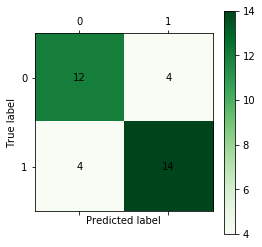

In [22]:
plt = cm_plot(y_data, y_)

In [23]:
sess.close()